In [54]:
# jupyter lab에서 자동완성이 않될때 사용하는 코드
%config Completer.use_jedi = False

# calcurate dice score

### Reference

- https://gist.github.com/brunodoamaral/e130b4e97aa4ebc468225b7ce39b3137

In [55]:
def dice(im1, im2, empty_score=1.0):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        Both are empty (sum eq to zero) = empty_score
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    im_sum = im1.sum() + im2.sum()
    if im_sum == 0:
        return empty_score

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / im_sum

In [79]:
import os
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

In [80]:
path = './result/'
result_lst = os.listdir(path)

inputs_path, labels_path, pred_path = path+result_lst[1], path+result_lst[2], path+result_lst[3]

print(inputs_path, labels_path, pred_path)

./result/0_inputs.png ./result/0_labels.png ./result/0_pred.png


In [81]:
label = Image.open(labels_path).convert('1')
pred = Image.open(pred_path).convert('1')

In [82]:
dice(label, label)

1.0

In [83]:
dice(label, pred)

0.8803202034938091

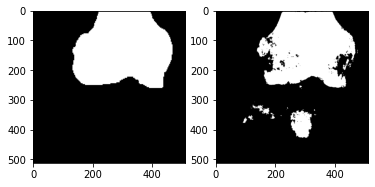

In [84]:
plt.subplot(121)
plt.imshow(label)

plt.subplot(122)
plt.imshow(pred)

plt.show()

In [66]:
lst = [i for i in result_lst if i.startswith('8')]
lst

['8_inputs.png', '8_labels.png', '8_pred.png']

In [68]:
inputs_path, labels_path, pred_path = path+lst[0], path+lst[1], path+lst[2]

print(inputs_path, labels_path, pred_path)

./result/8_inputs.png ./result/8_labels.png ./result/8_pred.png


In [69]:
label = Image.open(labels_path).convert('1')
pred = Image.open(pred_path).convert('1')

In [70]:
dice(label, pred)

0.9486171291087918

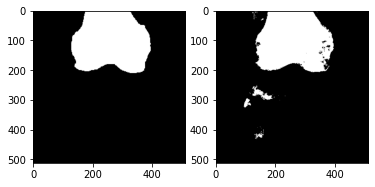

In [78]:
plt.subplot(121)
plt.imshow(label)

plt.subplot(122)
plt.imshow(pred)

plt.show()

./result/5_inputs.png ./result/5_labels.png ./result/5_pred.png
Dice:  0.8615755990847143


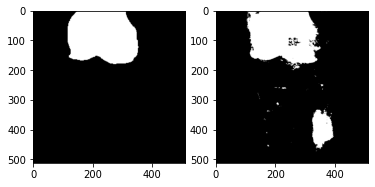

In [95]:
lst = [i for i in result_lst if i.startswith('5')]
lst
inputs_path, labels_path, pred_path = path+lst[0], path+lst[1], path+lst[2]

print(inputs_path, labels_path, pred_path)

label = Image.open(labels_path).convert('1')
pred = Image.open(pred_path).convert('1')

print("Dice: ", dice(label, pred))

plt.subplot(121)
plt.imshow(label)

plt.subplot(122)
plt.imshow(pred)

plt.show()